# Image analysis notebook


## Introduction

Image analysis is an important part of materials science. Microstructures, or morphologies are often imaged using microscopes and often we are interested in quantifying, that is, measuring different features. These could be pore areas, cell sizes, fibre lengths, grain sizes, crack widths etc. In some cases we might be interested in analysing the image of a spectrum or a diffraction pattern for example. Here is a gratuitously pretty image of the microstruture of a 3D printed aerospace titanium alloy:

![3D printed Ti Alloy Microstructure](http://www.cl.eps.manchester.ac.uk/medialand/chem_eng/images/research/facilities-institutes/emc-1_340x140.jpg)

Since it is now easy to digitise images, it is easy to exploit the power of computers to process and analyse them. Digital image processing is a big subject and there are many [multi-volume books](http://www.springer.com/us/book/9781848001909) dedicated to image processing techniques. For general image processing, it's often easier to use a dedicated image processing program like the excellent [imageJ](http://imagej.net/Welcome), for example. 

In this notebook, we will used python to do some simple image processing and analysis. The aim is to understand how digital images are structured and to explore how the power of python and its packages can be used to make scientific measurements on images.

As usual, we start by importing the usual useful python modules <code>numpy</code> and <code>matplotlib</code>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

For this notebook we also suppress warnings. This doesn't interfere with the code and avoids confusing warning (not error) messages:

In [2]:
import warnings
warnings.simplefilter('ignore')

## Images as arrays

The first step in working with digital images is to get used to the idea that images are just arrays of numbers. For example, the next array might not mean much to you: 

In [3]:
mysterious =np.array(
[[125,118,115,117,122,118,122,131,130,121,122,130,126,121,123,120,129,128],
 [140,134,130,128,132,140,137,132,136,137,136,140,133,128,130,130,132,133],
 [143,147,141,136,146,117, 57, 24, 40, 69,117,146,136,130,136,138,139,144],
 [156,153,145,159,128, 59,105, 64, 13,  0,  0,129,153,139,144,151,152,145],
 [164,159,159,162, 91,179,198,163, 75, 17,  0, 57,157,158,159,158,159,156],
 [175,165,173,128,102,193,196,177,118, 61, 19,  0,115,141,152,156,162,165],
 [158,181,182, 72, 97,161,170,131,115, 68, 10,  0, 56, 92,117,131,160,167],
 [100,158,146, 51, 83,117,126,101,101, 89,  0,  9, 40, 67, 81, 81,155,168],
 [ 65, 70, 66,  0,133,178,143,166,168, 84,  0, 13, 32, 74, 83, 75,132,147],
 [ 54, 49, 37,  0, 96,162,108,145,123, 33, 14, 12, 19, 50, 68, 73, 88, 91],
 [ 53, 48, 38, 17, 45,137, 96,101, 97, 36, 12, 11, 18, 37, 40, 34, 45, 60],
 [ 44, 51, 54, 37,  0,105,146, 88, 62, 26, 15,  9, 18, 45, 53, 49, 54, 54],
 [ 60, 77, 78, 33, 16,  0, 70, 33, 12, 28, 19, 11, 13, 36, 50, 47, 42, 33],
 [ 77, 89, 79, 33, 27,  0, 53, 87, 56, 75, 41,  6, 18, 32, 58, 61, 60, 72],
 [ 50, 42, 38, 23,  4, 29,113,134,125,131, 77, 20, 31, 12, 34, 54, 78, 97],
 [ 38, 20, 25,  0, 47,148,182,174,175,161, 90, 41, 29,  5, 13, 87,111, 86],
 [ 50, 45, 26,  0,113,193,197,187,188,162, 88, 31, 27, 56, 33, 38, 82, 98],
 [ 77, 33,  0, 93,181,196,198,199,193,167, 88, 68, 94, 83, 46,  1, 16, 52],])

We will now use <code> matplotlib </code> to plot it. We are going to use the `imshow` function, which is similar to the `matshow` function we used in the first week to plot matrices. Do you recognise the image?

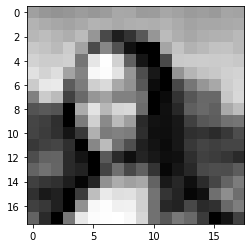

In [4]:
plt.imshow(mysterious,cmap='gray',interpolation='none');

<div class="alert alert-success"> 
Notice how, in the `imshow` command above, we *pass on* two arguments: `cmap` and `interpolation`. These are options in `imshow` that tell the function to use a grayscale to represent the values of the array and to not interpolate the image.

Usually, you can find out what kind of arguments a function uses by calling up the documentation string of the function, with the question mark magic:
<div>

In [5]:
plt.imshow?

Most functions will have a signature that lists all the possible arguments. As you can see `imshow` has many arguments, and they are all optional. You don't need to know all these options, not many people do! You will discover them as you use different functions more and more, and what you want to achieve changes.
<div>

### Back to image analysis

In this image each pixel corresponds to one value, ranging from 0 to 256. We can plot a histogram that shows the distribution of values making up the image:

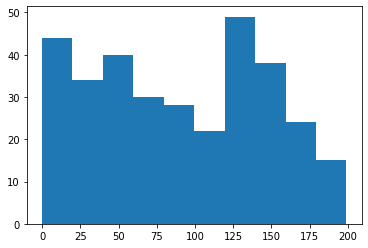

In [6]:
plt.hist(mysterious.flatten()); # note that we flatten the array

Here we use `.flatten` to flatten the array into a 1D array for plotting the histogram. Otherwise the `hist` function will try to plot a histogram for each row. Try it!

The point is that an image is just an array of intensity values and can be plotted using any "colour scale" by using different colour maps. For example with <code>jet</code> it looks like this:

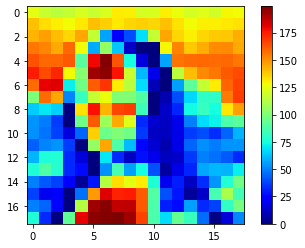

In [7]:
plt.imshow(mysterious,cmap='jet',interpolation='none');
plt.colorbar(); # colorbar

This time we have added a `colorbar` to the plot. This shows how the colours relate to the intensity values in the arrays. 
As you can see the choice of color map can significantly change your image. Mona Lisa in <code>jet</code> doesn't really look like Mona Lisa. Let's try another color map, <code>bone</code>:

In [ ]:
plt.imshow(mysterious,cmap='bone',interpolation='none');
plt.colorbar();

You can list all available colourmaps by running the `colormaps` command: 

*jupyter tip*: press <kbd>o</kbd> (letter 'o') to hide the output of the cell

In [ ]:
plt.colormaps()

There are rather a lot. You might prefer to browse them [here](http://matplotlib.org/examples/color/colormaps_reference.html).

### <span style="color: red"> Task 1:</span> Display the `mysterious` array using a different colormap of your choice:

### <span style="color: blue"> Solution:</span>

## Image formats

Although all images are all ultimately arrays of pixels, image files can store this information in a number of ways, or formats. In some cases all the values are stored without loss (e.g. .bmp and .tif) but these files can quickly become unfeasibly large. Instead, files are usually stored in "lossy" compressed formats (e.g. .jpg and .png). These formats contain the intensity values in encoded, compressed format and the image needs to be decoded using an algorithm. Opening such files can therefore be difficult, but because we are using Python ...wait for it... *there is a package for that.*

We are going to use the scikit-image package, called [skimage](http://scikit-image.org/docs/dev/api/skimage.html). To open image files, we need the input/output <code>io</code> subpackage:

In [ ]:
from skimage import io
from skimage import color

Then, opening an image in any standard format is only one command away: 

In [ ]:
image=io.imread('Grey_Mona_lisa.jpg')

We can then plot it using <code>matplotlib</code>:

In [ ]:
plt.imshow(image);

In [ ]:
gs_image=color.rgb2gray(image)

In [ ]:
np.shape(gs_image)

In [ ]:
plt.imshow(gs_image,'plasma')
plt.axis('off')

We can also use the `imshow` function from `skimage` to plot the image.

In [ ]:
io.imshow(image);

The function `imshow` from `skimage` does not rescale the intensity levels. What does this mean? Whereas `imshow` from `matplotlib` will give you the best view of the data by using the full colourscale and setting the minimum value to black and he maximum to white, `imshow` from `skimage` shows you the most faithful representation of the image by setting 0 to black and 255 (the highest intensity for an 8-bit image: $2^8=256$) to white. This way the original look of the image is preserved. In this case they are almost the same but dark and bright images would look very different.

### <span style="color: red"> Task 2:</span> Crop the large Mona Lisa image above just below the neck and display it using <code>io.imshow</code>

**Tip:** use the array slicing you learned in session one to select the columns and rows you want.

### <span style="color: blue"> Solution:</span>

## Analysing images

Now we'll look at some images that might be more interesting to materials scientists. Here is an image of a deformed aluminium alloy containing intermetallic particles. Read the image file in using the `io.imread` function from `skimage` and display it:

In [ ]:
alloy=io.imread('image004.png')
io.imshow(alloy);

This alloy is strengthened by small intermetallic particles, which appear white when imaged in a scanning electron microscope (SEM) in [backscattered mode](https://en.wikipedia.org/wiki/Scanning_electron_microscope#Detection_of_backscattered_electrons). The strength of the alloy depends on the volume fraction and size of these particles, so metallurgists are often interested in measuring these.

We can zoom into any region of the image to take a closer look. First it's useful to see how many rows and columns our image has. To do this we use the function `shape` from `numpy`:

In [ ]:
np.shape(alloy)

The function tells us the image is 228 pixels high and 341 pixels wide.

Lets display the top left $50\times50$ pixels:

In [ ]:
io.imshow(alloy[:50,:50])

### <span style="color: red"> Task 3:</span>  Use array slicing to plot different regions of the image and identify a region where the individual particles are clear and representative.

### <span style="color: blue"> Solution:</span>

As you can see the particles are mostly white but have grey borders and are embedded in a matrix which has many shades of grey. If we could find a way of counting just the white pixels, that would give us the area fraction of particles, wouldn't it?

Lets use the function <code>histogram</code> from the <code>exposure</code> subpackage from <code>skimage</code> to plot the distribution of grey scale values. Firs we import the subpackage exposure:

In [ ]:
from skimage import exposure

Now we can plot the histogram. We are using a new `matplolib` function called `fill_between`. Do you know what it does? How can you find out?

In [ ]:
histogram=exposure.histogram(alloy)
plt.fill_between(histogram[1],histogram[0],alpha=0.5, color='b')
plt.xlim([0,256]);
plt.ylabel('Number of pixels')
plt.xlabel('Intensity (greyscale value)')

The histogram shows the distribution of grey scale values, with 0 corresponding to black and 255 to white. As you can see there are no black pixels and there is a very broad distribution around an intensity of 100. There is also a very sharp peak at 256. Can you explain where it comes from?

## Separating the particles from the matrix - thresholding

In order to measure the particles, we need to first be able to separate them from the matrix. We know that the particles are white, therefore if we need to find a way of separating the white pixels from the rest. We need to create a boolean (true/false) array, which is 1 when the pixels are white (intensity > 254) and 0 when it's not. Using <code>numpy</code>, this is easy. We assign a new array, called `white_pixels` to the result of the comparison between our image and the value 254.

In [ ]:
white_pixels = alloy > 254

This process is called _**thresholding**_. Lets display the resultant boolean array. This is not an image, but an array of true false. We can use `imshow` from `matplotlib` to display it:

In [ ]:
plt.imshow(white_pixels,cmap='gray'); #note se chose the grayscale colourmap

To see if we've been successful in separating the particles, we should compare the image of the boolean array with the original image, side by side using <code>subplots</code> from <code>matplotlib</code>:

In [ ]:
f,images=plt.subplots(1,2, figsize=(16,9))# the figsize option allows us to change the size of the image
images[0].imshow(alloy,cmap='gray',interpolation='none' )
images[1].imshow(white_pixels, cmap='gray');

<div class="alert alert-success">
In the cell above, we have used an advanced form of plotting that enables us to display more than one set of plots in one figure. First we create the subplots using `plt.subplots`, which specifies the number of rows and columns we need (1,2 in this case). We also use the `figsize` argument to change the size of the figure (16,9 in this case for widescreen!). When we call the `subplots` function we assign two new variables: `f`, which is a handle to the figure, and `images` which is a list of all the subplots in the figure. To plot in each of the subplots, we run the plotting functions on each subplot. So `image[0].imshow(array)` will display `array` in the first subplot, `image[1].imshow(array)` in the second etc.
<div>

### Back to image analysis

It's easier to compare the images if we zoom in:

In [ ]:
f,images=plt.subplots(1,2)
images[0].imshow(alloy[-150:,-150:],cmap='gray',interpolation='none')
images[1].imshow(white_pixels[-150:,-150:],cmap='gray',interpolation='none');

It appears that although we have managed to separate some particles, we have not picked up all of them, and the ones we have are smaller than the particles in the image. This is because some particles are not actually white but a very bright grey. This means our threshold value of 254 is too high. 

### <span style="color: red"> Task 4:</span> Use different values of threshold to separate the particles and choose the one you think best represents the particles in the original image

### <span style="color: blue"> Solution:</span>

## Automatic thresholding

As you can see it's not easy to determine the "ideal" threshold and different people will choose different values. This makes thresholding problematic because it depends on the user, i.e. it is subjective.

To avoid this, we can use an automatic thresholding algorithm, like [Otsu's method](http://en.wikipedia.org/wiki/Otsu’s_method), which we can also find in <code>skimage</code>:

In [ ]:
from skimage.filters import threshold_otsu

Let's see what Otsu's method gives us:

In [ ]:
thresh=threshold_otsu(alloy)
print(thresh)

Let's see what Otsu's method gives:

In [ ]:
otsu_pixels = alloy > 140
f,images=plt.subplots(1,2)
images[0].imshow(alloy[-150:,-150:],cmap='gray',interpolation='none')
images[1].imshow(otsu_pixels[-150:,-150:],cmap='gray',interpolation='none')

How well do you think the Otsu thresholding does?

## Measuring particle fraction 

Now that we have discovered thresholding we can measure the fraction of particles in our alloy. We do this simply by dividing the number of white pixels in the binary image by the total number of pixels. There are many different ways of doing this but since the white pixels are 1 and the black pixels are 0, we can just sum the binary image array and divide by the total number of pixels.

So for my manual threshold value of 200 the fraction of particles is:

In [ ]:
my_thresh = alloy > 200
total_pixels=np.size(my_thresh) # total pixels in the image
white_pixels=my_thresh.astype(int).sum() #sums all the values in my_tresh after converting it into an integer array.
my_particle_frac=white_pixels/total_pixels #get pixel fraction
print('My particle fraction is {0:.2f}%'.format(my_particle_frac*100)) #print it nicely

Whereas for Otsu's method it is:

In [ ]:
my_thresh = alloy > thresh # remember thresh if the value the automatic method (Otsu's method) found.
total_pixels=np.size(my_thresh)
white_pixels=my_thresh.astype(int).sum()
my_particle_frac=white_pixels/total_pixels
print('Otsu\'s particle fraction is {0:.2f}%!'.format(my_particle_frac*100))

<div class="alert alert-success">

There are a few of new things happening in the cells above. First we are using the `np.size` function, which tells us the number of elements in an array. 
Then we have a chaining of methods on an array:

...`= my_thresh.astype(int).sum()`

what is happening here? Well it's easier then it seems. First we are using the `astype(integer)` method on the my_tresh array, which is boolean (True/False), to convert it into an array of integers containing 0s and 1s. Then we apply the method `sum`, which returns the sum of all the elements of the array. We do both these things because it is easier to understand what summing ones and zeros is, than what summing 'True' and 'False' is. This chaining of methods avoids defining an intermeadite variable. For example, we could have done:

`total_pixels=np.size(my_thresh)`

`white_pixels_integers=my_thresh.astype(int)`

`white_pixels_sum=white_pixels_integers.sum()`

would achieve the same result.
<div>

The thresholding examples above show how, for an image with a very smooth distribution of greyscale values, getting an exact value of volume fraction is very difficult. With python we can quickly see how the calculated volume fraction depends on the selected threshold. To do this we first create an array of threshold values using `linspace`. 

In [ ]:
thresh_values=np.linspace(56,256,200)

Then we iterate over each value and calculate the fraction of particles, using the same code we used earlier:

In [ ]:
frac=[]
for val in thresh_values:
    my_thresh = alloy > val
    total_pixels=np.size(my_thresh)
    white_pixels=my_thresh.astype(int).sum()
    my_particle_frac=white_pixels/total_pixels
    frac.append(my_particle_frac*100)

Finally, we plot the fraction of particles calculated using `matplotlib`. Notice the use of a new `matplotlib` function, `axvline`. What does it do?

In [ ]:
plt.plot(thresh_values,frac,'o')
plt.axvline(140,color='red')
plt.ylabel('Particle fraction (%)')
plt.xlabel('Threshold');

Otsu's method picks a value where the change in particle fraction changes slope. Is that the "right" value? It's impossible to be sure. What this shows is that if we want to measure particles or other interesting features of the microstructure, we should try to separate them during the image acquisition.

## Particle size

To finish today's session, we will look at another important parameter in materials science: the particle size and shape. To measure this we need to be able to separate individual particles. For this task we will use a different image.

The image below is a high resolution image of Ni nanoparticles, imaged with a high resolution transmission electron microscope (TEM). 

In [ ]:
nanoparticles=io.imread('nanoparticles.tif')

In [ ]:
io.imshow(nanoparticles)

The first step is to use thresholding to separate the images from the background. We'll use Otsu's method:

In [ ]:
nano_thresh = threshold_otsu(nanoparticles)
nano_bw = nanoparticles > nano_thresh
io.imshow(nano_bw)

### <span style="color: red"> Task 5:</span> By plotting only smaller sections of the binary image, or by plotting the intensity profile across the image, estimate the size of the particles

### <span style="color: blue"> Solution:</span>

### Measuring particles by labeling

Now that we have segmented the image we need to find a way of measuring each particle. To do this we turn back to <code>skimage</code> and its <code>measure</code> subpackage:

In [ ]:
from skimage import measure

The function <code>label</code> finds all the separate regions in the image and labels them:

In [ ]:
tags=measure.label(nano_bw)

We can see how well the labelling worked using by plotting the results:

In [ ]:
plt.imshow(tags, cmap='Paired')

It seems like it's done a reasonable job but not perfect. There are a number of very small regions that have been labeled as particles when they are just holes in the particles. There are ways to fix this but for now, we'll just have to remember that there are some small labels we need to ignore.

The tags array has the same size as the original image but with labels where the particles are. We can see what these labels are by using the <code>unique</code> function of <code>numpy</code>:

In [ ]:
labels=np.unique(tags)

In [ ]:
print(labels)

The label function has identified 60 particles. The first label is for the background:

In [ ]:
io.imshow(tags==0);

We can now measure the particles individually. The particles can be selected by using the comparator <code>==</code>. For example the particle labeled 28:

In [ ]:
io.imshow((tags==28))

What is the size of particle 28? As you can see above, using <code>==</code> gives a boolean array which is only true where the selected tag exists. We need to convert it into a integer array made up of 0's and 1's, so that the size of the particle (in pixels) is just the sum of the array. We have done this before, when thresholding, we can just use the same method.

In [ ]:
particle28=(tags==28).astype(int)
particle_area=particle28.sum()
print(particle_area)

We can convert this area into an "equivalent diameter" by remembering that the area of a circle is $A=\dfrac{\pi d^2}{4}$. So the "equivalent radius" is $d=\sqrt{\dfrac{4A}{\pi}}$ and the equivalent diameter of particle 28 is:

In [ ]:
particle_diameter=np.sqrt(4*particle_area/(np.pi))
print(particle_diameter)

Actually, it is so common to want to know the size of particles that the <code>skimage</code> has a function to do just this. It's called <code>regionprops</code>:

In [ ]:
measurements=measure.regionprops(tags)

One important thing to note is that this function disregards the background. So to measure particle 28, we need to use the index 27:

In [ ]:
measurements[27].equivalent_diameter

As you can see, the diameters obtained in the two different ways agree almost exactly!

### <span style="color: red"> Task 6:</span> Calculate the mean particle diameter of all the nanoparticles

### <span style="color: blue"> Solution:</span>

### <span style="color: red"> Bonus task:</span> Can you plot the distribution of diameters using a histogram?

### <span style="color: blue"> Solution:</span>